#**Download Dataset** 
####You don't need to do this step if you're not using Colab and downloading it from Drive

In [ ]:
!unzip "/content/drive/MyDrive/Dataset_csv_npy_64x1.zip"

Archive:  /content/drive/MyDrive/Dataset_csv_npy_64x1.zip
  inflating: Dataset_csv_npy_64x1/airplane.npy  
  inflating: Dataset_csv_npy_64x1/alarm clock.npy  
  inflating: Dataset_csv_npy_64x1/apple.npy  
  inflating: Dataset_csv_npy_64x1/arm.npy  
  inflating: Dataset_csv_npy_64x1/axe.npy  
  inflating: Dataset_csv_npy_64x1/backpack.npy  
  inflating: Dataset_csv_npy_64x1/banana.npy  
  inflating: Dataset_csv_npy_64x1/bandage.npy  
  inflating: Dataset_csv_npy_64x1/baseball bat.npy  
  inflating: Dataset_csv_npy_64x1/basketball.npy  
  inflating: Dataset_csv_npy_64x1/bed.npy  
  inflating: Dataset_csv_npy_64x1/belt.npy  
  inflating: Dataset_csv_npy_64x1/birthday cake.npy  
  inflating: Dataset_csv_npy_64x1/book.npy  
  inflating: Dataset_csv_npy_64x1/bucket.npy  
  inflating: Dataset_csv_npy_64x1/butterfly.npy  
  inflating: Dataset_csv_npy_64x1/candle.npy  
  inflating: Dataset_csv_npy_64x1/ceiling fan.npy  
  inflating: Dataset_csv_npy_64x1/cell phone.npy  
  inflating: Dataset_csv

#Import Packages

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
import matplotlib.figure
from sklearn.model_selection import train_test_split
import pandas as pd

from keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

#Declare variables

In [ ]:
rows=4
cols=5
vfold_ratio=0.1, 
max_items_per_class=3000
img_size=64
batch_size=32


#39
epochs=100

#300X300

#Get npy filepath 

In [ ]:
all_files = glob.glob(os.path.join('/content/Dataset_csv_npy_64x1', '*.npy'))
all_files.sort()
len(all_files)

26

#Get a training array X_train consisting of images array values for all categories

In [ ]:
#initialize variables 
x = np.empty([0, 64,64,1])
y = np.empty([0])
class_names = []
#test_label=[]
#testx=np.empty([0,784])
    #load each data file 
for idx, file in enumerate(all_files):
    data = np.load(file)
    #test = data[0:max_items_per_class, :]
    data = data[0: max_items_per_class, :]
    labels = np.full(data.shape[0], idx)
    x = np.concatenate((x, data), axis=0)
    #testx= np.concatenate((testx, test), axis=0)
    y = np.append(y, labels)

    class_name, ext = os.path.splitext(os.path.basename(file))
    class_name=class_name.split('_')[-1].split('.')[0]
    class_names.append(class_name)
data = None
labels = None
    
    #randomize the dataset 
permutation = np.random.permutation(y.shape[0])
X_train = x[permutation, :]
y = y[permutation].astype(int)

X_train.shape

(78000, 64, 64, 1)

#PLot a sample of images in dataset 

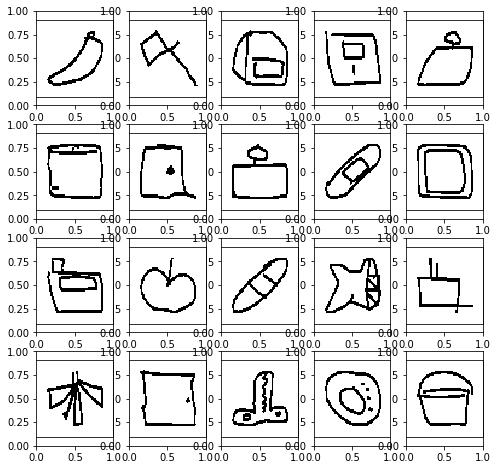

In [ ]:
X_train /= 255.0
fig, axes = plt.subplots(rows,cols, figsize=(8,8))
for i in list(range(0, min(len(X_train),(rows*cols)) )):    
    #fig = matplotlib.figure.Figure()
    a = fig.add_subplot(rows,cols,i+1)
    #a.text(10., -1.5, f'{class_names[y[i]]}')
    imgplot = plt.imshow(X_train[i].reshape((64,64)), interpolation='nearest',cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

#Preprocess Dataset and form training and validation splits

In [ ]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, len(class_names))
y.shape

(78000, 26)

In [ ]:
#X_train /= 255.0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.20, random_state=0)

X_train=X_train.reshape(X_train.shape[0],64,64,1)
X_test=X_test.reshape(X_test.shape[0],64,64,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(62400, 64, 64, 1)
(15600, 64, 64, 1)
(62400, 26)
(15600, 26)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

#Define Model

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3),padding='same',kernel_initializer='glorot_normal',input_shape=X_train.shape[1:], activation='relu'))
model.add(BatchNormalization(momentum = 0.8))
model.add(Conv2D(16, (3, 3),padding='same',input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation= 'relu'))
model.add(BatchNormalization(momentum = 0.8))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation= 'relu'))
model.add(BatchNormalization(momentum = 0.8))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(26, activation='softmax')) 


# Compile and print summary of model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 128)       1280      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 16)        18448     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        9280      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 16)       

In [ ]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(0.001),loss ="categorical_crossentropy",metrics=['acc'])


#Define Callbacks

#####1.ReduceLROnPlateau - Reduces Learning Rate if val_acc doesn't change in 3 consequtive epochs
#####2. Early Stopping- Stops if val_acc isn't increasing
#####3. Model Checkpoint- Saves best model

In [ ]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

erlystop=EarlyStopping(monitor='val_acc', min_delta=0, patience=7, verbose=0,mode='max', baseline=None)
cp_callback = ModelCheckpoint('/content/checkpoint', verbose=1, save_weights_only=True,save_freq='epoch',save_best_only=True,monitor='val_acc',mode='max')
rlrop = ReduceLROnPlateau(monitor='val_acc', patience=3,verbose=1,mode='max')

# Train Model

In [ ]:
model.fit(X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      #validation_split=0.3, # 1000 images = batch_size * steps
      validation_data=(X_test,y_test),	
      callbacks=[cp_callback,rlrop,erlystop],
      verbose=1)


Epoch 1/100
1950/1950 [==============================] - 25s 13ms/step - loss: 1.8791 - acc: 0.4895 - val_loss: 0.6435 - val_acc: 0.8106

Epoch 00001: val_acc improved from -inf to 0.81064, saving model to /content/checkpoint
Epoch 2/100
1950/1950 [==============================] - 24s 12ms/step - loss: 0.7667 - acc: 0.7725 - val_loss: 0.4918 - val_acc: 0.8537

Epoch 00002: val_acc improved from 0.81064 to 0.85365, saving model to /content/checkpoint
Epoch 3/100
1950/1950 [==============================] - 24s 12ms/step - loss: 0.6196 - acc: 0.8166 - val_loss: 0.4305 - val_acc: 0.8732

Epoch 00003: val_acc improved from 0.85365 to 0.87321, saving model to /content/checkpoint
Epoch 4/100
1950/1950 [==============================] - 24s 12ms/step - loss: 0.5388 - acc: 0.8393 - val_loss: 0.3875 - val_acc: 0.8858

Epoch 00004: val_acc improved from 0.87321 to 0.88577, saving model to /content/checkpoint
Epoch 5/100
1950/1950 [==============================] - 24s 12ms/step - loss: 0.4907 -

# Evaluate and save model

In [ ]:
model.evaluate(X_test,y_test)

488/488 [==============================] - 2s 5ms/step - loss: 0.2240 - acc: 0.9368


[0.22395086288452148, 0.9367948770523071]

In [ ]:
model.save('doodle_best(93%).h5')